In [27]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df_trips_jan = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')
df_trips_march = pd.read_parquet('data/yellow_tripdata_2023-03.parquet')

In [8]:
#1. Data for Jan 2023 has 19 columns
len(df_trips_jan.columns)

(19, 19)

In [15]:
df_trips_jan['duration'] = df_trips_jan.tpep_dropoff_datetime - df_trips_jan.tpep_pickup_datetime
df_trips_jan['duration'] = df_trips_jan.duration.dt.total_seconds() / 60

In [ ]:
#2. Standard deviation of the trips duration in January IS 42.59

In [16]:
df_trips_jan['duration'].std()

42.59435124195458

In [17]:
len(df_trips_jan[(df_trips_jan['duration'] >= 1 ) & (df_trips_jan['duration'] <= 60)]) /len(df_trips_jan) * 100

98.1220282212598

In [18]:
df_trips_jan = df_trips_jan[(df_trips_jan.duration >= 1) & (df_trips_jan.duration <= 60)].copy()

In [19]:
df_trips_jan 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [23]:
categorical = ['PULocationID', 'DOLocationID']
df_trips_jan[categorical] = df_trips_jan[categorical].astype(str)

In [24]:
train_dicts = c[categorical].to_dict(orient = 'records')

In [28]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [31]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [34]:
target = 'duration'
y_train = df_trips_jan[target].values

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared = False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649261932106969

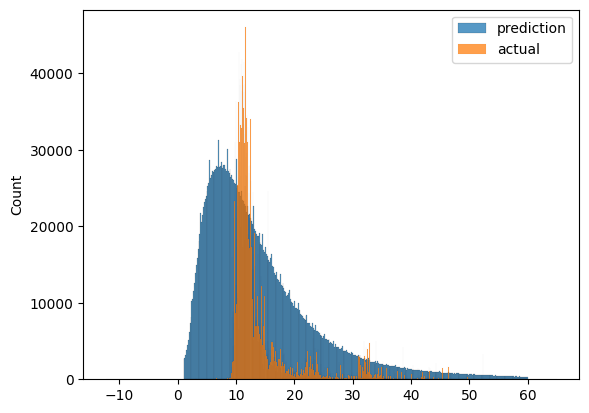

In [39]:
sns.histplot(y_train, label='prediction')
sns.histplot(y_pred, label='actual')

plt.legend();

In [41]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] =df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df
    

In [42]:
df_val = read_data('data/yellow_tripdata_2023-03.parquet')

In [44]:
val_dicts = df_val[categorical].to_dict(orient = 'records')

In [47]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [49]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


8.249440527525513